In [2]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import os

In [3]:
def correlacion(ls,k): #La funcion calcula la correlacion entre los valores de ls a pasos k
    valores=[]
    for i,v in enumerate(ls[:-k]):
        valores.append((v*ls[i+k]));
    mean_ik= sum(valores)/len(ls[:-k])
    mean_i2=(np.mean(ls))**2
    disp=np.std(ls)
    
    res=(mean_ik - mean_i2 )/(disp**2)
    return res

In [4]:
# Leemos el archivo
myFolder = (os.getcwd()) # busca en el directorio actual

with open (myFolder+'/Tira_it=10000.txt', 'r') as myfile:  
        deltas = [];
        aceptacion=[]
        tira=[]
        for myline in myfile: # For each line, stored as myline,
            datos = [float(i) for i in myline.split(' ') if i.strip()];
            tira.append(datos[1:-1])
            aceptacion.append(datos[-1])
            deltas.append(datos[0])

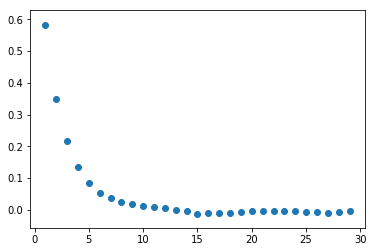

In [42]:
#Busco las probabilidades cercanas a pa=0.5 asi grafico solo esos valores
prob_a=[]
mean_correl=[]
ls_correl=[]  
kaes=[]

for i in range(0,len(aceptacion)):
        pa=aceptacion[i]/len(tira[i])
        if abs(pa-0.5)<0.01: #seleccionamos
            prob_a.append([i,pa])
            
for i in prob_a[:-1]:
    correl_k=[] 
    for k in range(1,30):
        correl_k.append(correlacion(tira[i[0]],k))
    ls_correl.append(correl_k)


for k in range(0,29):
    suma=0;
    kaes.append(k+1)
    for i in range(0,len(ls_correl)):
        suma=suma+ls_correl[i][k];
         
    prom=suma/len(prob_a[:-1]);    
    mean_correl.append(prom)
        
plt.scatter(kaes,mean_correl)
plt.show()

In [45]:
#Busco el k que me descorrelaciona mis valores, mi criterio es que ck < 0.1
for i in range(0,len(mean_correl)):
    if (mean_correl[i]<0.1):
        K=i+1;
        break
print('K es =', K)

K es = 5


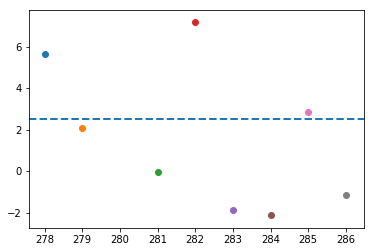

In [65]:
#O sea, para k=5 los datos estan descorrelacionados, entonces tengo que agarrar mis datos cada 5 pasos
#y calcular x^2 para cada tira
I_totales=[]
for j in prob_a[2:-5]:
    I_d=0
    equis_d=[]
    for i in range(0,len(tira[j[0]][:-5])):
        equis_d.append((tira[j[0]][i+5])**2-(tira[j[0]][i])**2)
        
    I_d=sum(equis_d)
    plt.scatter(j[0],I_d)
    I_totales.append(I_d)

plt.axhline(2.5, linestyle='--',linewidth=2)
plt.show()

In [66]:
D=[]
for i in prob_a[2:-5]:
    D.append(deltas[i[0]])

data = pd.DataFrame({"Delta":D,
                     "I":I_totales,
                    })#empty dataframe
data

,Delta,I
0,2.879998,5.641654
1,2.889998,2.078384
2,2.909998,-0.040302
3,2.919998,7.185357
4,2.929998,-1.866678
5,2.939998,-2.117541
6,2.949998,2.845137
7,2.959998,-1.147041
